In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
propeller = pd.read_csv('propeller_data.csv')

In [3]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords = prepare_propeller(propeller)

vect_length                  = vect_blade(propeller_coords)
dmiddle, dhighest, dlowest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades
#vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, vect_length)   #main directions

In [28]:
nb_point_each_side = 20
nb_seg = 10

In [29]:
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)   #get equations of planes for projection
all_plane_points = get_points(upper_blade, planes, nb_point_each_side)                  #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4
Points of plane 5
Points of plane 6
Points of plane 7
Points of plane 8
Points of plane 9


In [36]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

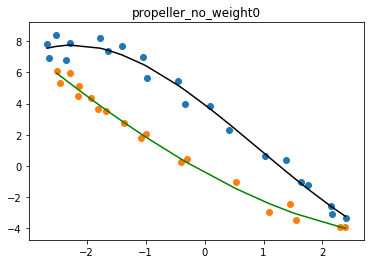

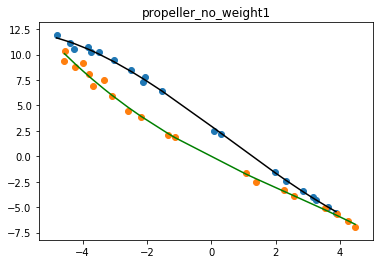

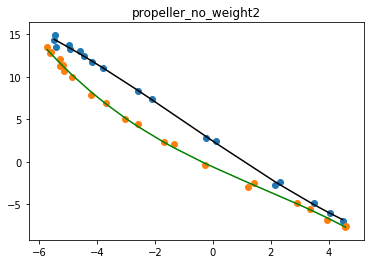

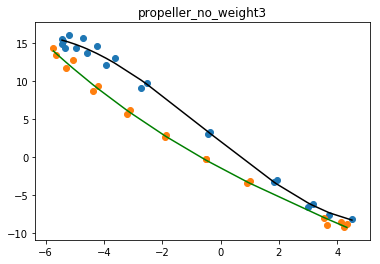

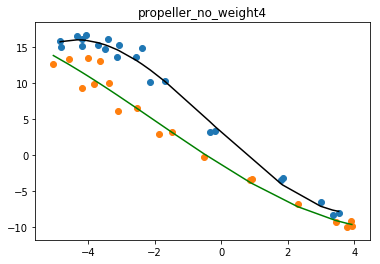

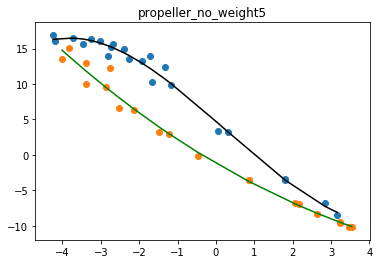

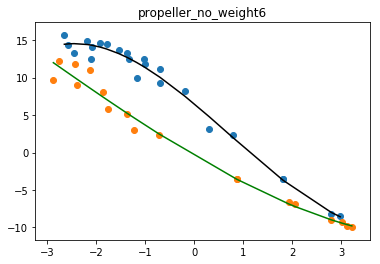

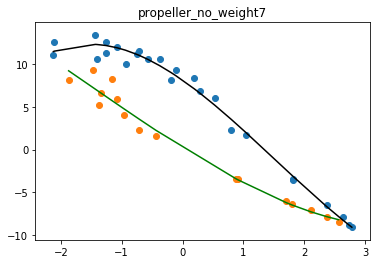

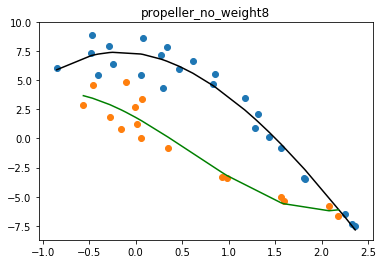

In [38]:
for i in range(9):
    plot_interpolation_both_sides(right_param[i], right_pts[i], left_param[i], left_pts[i], "propeller_no_weight" + str(i))

In [ ]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [39]:
hub_radius = param_hub_radius(propeller_coords, dmiddle, vect_length)
print(hub_radius)

6.7607001499727


### Tip radius

In [40]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80402884921585


### Blade twist

In [59]:
blade_twist = get_blade_twist(all_plane_points)

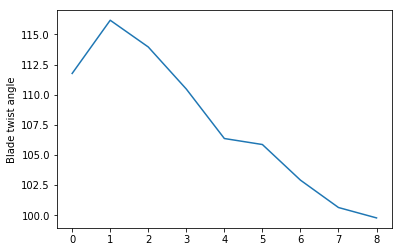

In [60]:
plt.plot(blade_twist)
plt.ylabel('Blade twist angle')
plt.show()

### Chord length

In [58]:
chord_length = get_chord_length(all_plane_points)
print(chord_length)

[13.28121630764225, 21.246721112726732, 25.837429856624343, 26.98697390488726, 28.011005307299346, 31.184259990930485, 26.48207630689962, 23.25402826759834, 16.959228935552463]


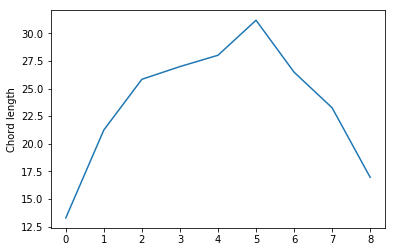

In [47]:
import matplotlib.pyplot as plt
plt.plot(chord_length)
plt.ylabel('Chord length')
plt.show()